<a href="https://colab.research.google.com/github/u-t-k-a-n/Detection-of-Similar-Points-in-Traffic-Characteristics/blob/main/NonRushHour2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
path = "drive/MyDrive/2017_concat/Concat_2017.csv"

Mounted at /content/drive


In [ ]:
df = pd.read_csv(path)

In [ ]:
non_rush_hour_index = set()

In [ ]:
for i in range(0,24*60//5):
  hour = int(df.loc[i]["time"][11:13])

  if not ((8 <= hour <= 9) or (17 <= hour <= 19)):
    non_rush_hour_index.add(i)

In [ ]:
all_index = list()
for i in range(1,366):
  for j in non_rush_hour_index:
    all_index.append(i*j)
x = list()
for i in all_index:
  x.append(df.loc[i])
df2 = pd.DataFrame()
df2 = df2.append(x)
df_corr = df2.corr()
arr = df_corr.copy()
arr

,drive/MyDrive/2017_v1/739_1_2017.csv,drive/MyDrive/2017_v1/482_1_2017.csv,drive/MyDrive/2017_v1/1920_1_2017.csv,drive/MyDrive/2017_v1/715_0_2017.csv,drive/MyDrive/2017_v1/1778_0_2017.csv,drive/MyDrive/2017_v1/722_1_2017.csv,drive/MyDrive/2017_v1/306_1_2017.csv,drive/MyDrive/2017_v1/1832_1_2017.csv,drive/MyDrive/2017_v1/1923_1_2017.csv,drive/MyDrive/2017_v1/603_1_2017.csv,drive/MyDrive/2017_v1/1868_1_2017.csv,drive/MyDrive/2017_v1/588_1_2017.csv,drive/MyDrive/2017_v1/485_1_2017.csv,drive/MyDrive/2017_v1/743_1_2017.csv,drive/MyDrive/2017_v1/380_1_2017.csv,drive/MyDrive/2017_v1/420_1_2017.csv,drive/MyDrive/2017_v1/1431_0_2017.csv,drive/MyDrive/2017_v1/931_0_2017.csv,drive/MyDrive/2017_v1/256_0_2017.csv,drive/MyDrive/2017_v1/1730_1_2017.csv,drive/MyDrive/2017_v1/452_0_2017.csv,drive/MyDrive/2017_v1/721_0_2017.csv,drive/MyDrive/2017_v1/1967_1_2017.csv,drive/MyDrive/2017_v1/187_1_2017.csv,drive/MyDrive/2017_v1/1746_0_2017.csv,drive/MyDrive/2017_v1/30_0_2017.csv,drive/MyDrive/2017_v1/70_1_2017.csv,drive/MyDrive/2017_v1/102_0_2017.csv,drive/MyDrive/2017_v1/601_0_2017.csv,drive/MyDrive/2017_v1/337_0_2017.csv,drive/MyDrive/2017_v1/694_0_2017.csv,drive/MyDrive/2017_v1/181_0_2017.csv,drive/MyDrive/2017_v1/641_0_2017.csv,drive/MyDrive/2017_v1/644_1_2017.csv,drive/MyDrive/2017_v1/203_0_2017.csv,drive/MyDrive/2017_v1/509_0_2017.csv,drive/MyDrive/2017_v1/326_0_2017.csv,drive/MyDrive/2017_v1/497_0_2017.csv,drive/MyDrive/2017_v1/880_0_2017.csv,drive/MyDrive/2017_v1/821_1_2017.csv,...,drive/MyDrive/2017_v1/726_1_2017.csv,drive/MyDrive/2017_v1/251_1_2017.csv,drive/MyDrive/2017_v1/83_0_2017.csv,drive/MyDrive/2017_v1/514_0_2017.csv,drive/MyDrive/2017_v1/1836_0_2017.csv,drive/MyDrive/2017_v1/504_1_2017.csv,drive/MyDrive/2017_v1/1438_1_2017.csv,drive/MyDrive/2017_v1/599_0_2017.csv,drive/MyDrive/2017_v1/1858_1_2017.csv,drive/MyDrive/2017_v1/638_1_2017.csv,drive/MyDrive/2017_v1/21_0_2017.csv,drive/MyDrive/2017_v1/480_1_2017.csv,drive/MyDrive/2017_v1/891_1_2017.csv,drive/MyDrive/2017_v1/399_1_2017.csv,drive/MyDrive/2017_v1/589_0_2017.csv,drive/MyDrive/2017_v1/1831_1_2017.csv,drive/MyDrive/2017_v1/750_0_2017.csv,drive/MyDrive/2017_v1/1440_1_2017.csv,drive/MyDrive/2017_v1/884_1_2017.csv,drive/MyDrive/2017_v1/387_1_2017.csv,drive/MyDrive/2017_v1/613_0_2017.csv,drive/MyDrive/2017_v1/529_0_2017.csv,drive/MyDrive/2017_v1/17_1_2017.csv,drive/MyDrive/2017_v1/453_1_2017.csv,drive/MyDrive/2017_v1/392_1_2017.csv,drive/MyDrive/2017_v1/740_0_2017.csv,drive/MyDrive/2017_v1/706_1_2017.csv,drive/MyDrive/2017_v1/881_1_2017.csv,drive/MyDrive/2017_v1/308_0_2017.csv,drive/MyDrive/2017_v1/279_0_2017.csv,drive/MyDrive/2017_v1/1837_0_2017.csv,drive/MyDrive/2017_v1/1853_0_2017.csv,drive/MyDrive/2017_v1/202_0_2017.csv,drive/MyDrive/2017_v1/1891_0_2017.csv,drive/MyDrive/2017_v1/619_1_2017.csv,drive/MyDrive/2017_v1/189_0_2017.csv,drive/MyDrive/2017_v1/1751_0_2017.csv,drive/MyDrive/2017_v1/641_1_2017.csv,drive/MyDrive/2017_v1/542_1_2017.csv,drive/MyDrive/2017_v1/714_1_2017.csv
drive/MyDrive/2017_v1/739_1_2017.csv,1.000000,0.414554,0.195963,0.344304,0.550775,0.209145,0.073519,0.308919,0.200093,0.375856,0.268382,0.458071,0.555442,0.201267,0.422540,0.757476,0.251172,0.120442,0.190720,0.563177,0.473176,0.272508,0.058237,0.511237,0.411814,0.244485,0.658947,0.532623,0.520273,0.555620,0.078026,0.082740,0.204861,0.330746,0.391280,-0.040242,0.505047,0.369758,0.326431,-0.219032,...,0.290249,0.189471,0.362769,0.286340,0.298909,0.681462,0.225542,-0.274691,0.341126,0.437998,0.323991,0.426112,0.107678,0.279718,0.147050,0.021380,0.378781,0.253751,0.030421,0.224612,0.562822,0.339755,-0.039909,0.627219,0.091003,0.621964,0.271993,0.055898,0.653031,0.187302,0.297953,0.150122,0.370514,0.322742,0.577306,0.584599,0.226241,0.209452,0.187093,0.173320
drive/MyDrive/2017_v1/482_1_2017.csv,0.414554,1.000000,0.409410,0.521023,0.591288,0.449061,0.251945,0.529439,0.413954,0.666501,0.518017,0.356141,0.756420,0.293992,0.614588,0.351729,0.456044,0.325163,0.443756,0.353418,0.636405,0.456393,0.131436,0.727788,0.37

In [ ]:
cols = list(arr.columns)
corr = np.array(arr)
corr

array([[1.        , 0.41455412, 0.19596349, ..., 0.20945197, 0.18709324,
        0.17331999],
       [0.41455412, 1.        , 0.40940997, ..., 0.34938331, 0.19064971,
        0.36351504],
       [0.19596349, 0.40940997, 1.        , ..., 0.53522586, 0.21298263,
        0.52364481],
       ...,
       [0.20945197, 0.34938331, 0.53522586, ..., 1.        , 0.18495603,
        0.45579779],
       [0.18709324, 0.19064971, 0.21298263, ..., 0.18495603, 1.        ,
        0.19174937],
       [0.17331999, 0.36351504, 0.52364481, ..., 0.45579779, 0.19174937,
        1.        ]])

In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster,dendrogram
from scipy.spatial.distance import squareform
corr = (corr + corr.T)/2  # making symmetric
np.fill_diagonal(corr, 1) # making diagonal 1
dissimilarity = 1 - np.abs(corr)

In [ ]:
from collections import defaultdict

In [ ]:
hierarchy = linkage(squareform(dissimilarity), method='single')
labels = fcluster(hierarchy, 0.7, criterion='distance')
labels.max()

5

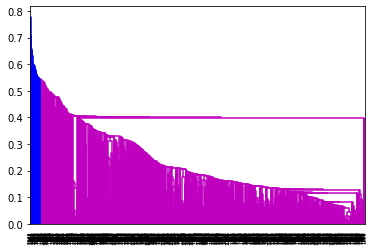

In [ ]:
den = dendrogram(hierarchy)

In [ ]:
clusters = defaultdict(list)
for i,val in enumerate(labels):
  clusters[val].append(cols[i])
for cluster in clusters:
  print("cluster:{} len:{}".format(cluster,len(clusters[cluster])))

cluster:1 len:1462
cluster:5 len:1
cluster:4 len:1
cluster:2 len:1
cluster:3 len:1


In [ ]:
hierarchy = linkage(squareform(dissimilarity), method='complete')
labels = fcluster(hierarchy, 0.7, criterion='distance')
labels.max()

70

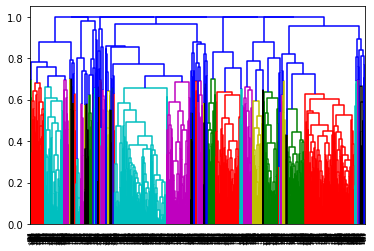

In [ ]:
den = dendrogram(hierarchy)

In [ ]:
clusters = defaultdict(list)
for i,val in enumerate(labels):
  clusters[val].append(cols[i])
for cluster in clusters:
  print("cluster:{} len:{}".format(cluster,len(clusters[cluster])))

cluster:60 len:81
cluster:49 len:106
cluster:34 len:231
cluster:54 len:68
cluster:61 len:218
cluster:4 len:27
cluster:52 len:44
cluster:51 len:38
cluster:46 len:1
cluster:35 len:103
cluster:53 len:4
cluster:50 len:17
cluster:10 len:16
cluster:65 len:19
cluster:3 len:82
cluster:45 len:10
cluster:43 len:24
cluster:41 len:14
cluster:2 len:58
cluster:9 len:21
cluster:37 len:6
cluster:25 len:18
cluster:57 len:7
cluster:13 len:19
cluster:62 len:11
cluster:26 len:18
cluster:31 len:6
cluster:23 len:4
cluster:17 len:2
cluster:6 len:8
cluster:48 len:39
cluster:21 len:5
cluster:14 len:3
cluster:8 len:12
cluster:15 len:11
cluster:38 len:7
cluster:68 len:1
cluster:55 len:2
cluster:22 len:6
cluster:39 len:1
cluster:44 len:2
cluster:1 len:6
cluster:12 len:14
cluster:7 len:2
cluster:42 len:2
cluster:58 len:17
cluster:59 len:2
cluster:63 len:5
cluster:30 len:6
cluster:5 len:7
cluster:11 len:2
cluster:27 len:1
cluster:32 len:5
cluster:56 len:6
cluster:36 len:2
cluster:69 len:1
cluster:20 len:2
cluster:2

In [ ]:
path = 'drive/MyDrive/Metadata/Coordinates_2017.csv'
df = pd.read_csv(path)
df["cluster"] = -1
for i in range(len(df)):
  file_name =  'drive/MyDrive/2017_v1/{}_{}_2017.csv'.format(int(df.loc[i]["vSegID"]),int(df.loc[i]["vSegDir"]))
  for cluster in clusters:
    if file_name in clusters[cluster]:
      df.iloc[i] = [int(df.loc[i]["vSegID"]), int(df.loc[i]["vSegDir"]),
                   df.loc[i]["longitude"], df.loc[i]["latitude"],
                   cluster]
      break

df.to_csv("drive/MyDrive/SimilarityScores/Coordinates/2017/NonRushHourCompleteClusterCoord_2017.csv")

In [ ]:
import plotly.express as px
path = "drive/MyDrive/SimilarityScores/Coordinates/2017/NonRushHourCompleteClusterCoord_2017.csv"
df = pd.read_csv(path)
df = df.drop("Unnamed: 0",axis=1)
df["cluster"] = df["cluster"].astype(str)
fig = px.scatter_mapbox(df, lon='latitude', lat='longitude', hover_name='vSegID', hover_data=['vSegDir',"cluster"],
                        color="cluster", zoom=4, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
hierarchy = linkage(squareform(dissimilarity), method='weighted')
labels = fcluster(hierarchy, 0.7, criterion='distance')
labels.max()

38

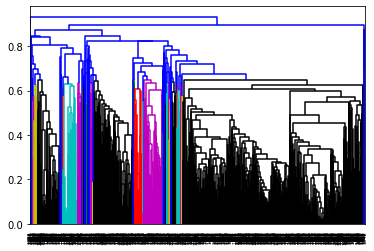

In [ ]:
den = dendrogram(hierarchy)

In [ ]:
clusters = defaultdict(list)
for i,val in enumerate(labels):
  clusters[val].append(cols[i])
for cluster in clusters:
  print("cluster:{} len:{}".format(cluster,len(clusters[cluster])))

cluster:21 len:125
cluster:3 len:125
cluster:35 len:798
cluster:17 len:190
cluster:19 len:1
cluster:7 len:68
cluster:30 len:15
cluster:32 len:21
cluster:34 len:19
cluster:37 len:3
cluster:5 len:8
cluster:8 len:20
cluster:33 len:8
cluster:12 len:14
cluster:24 len:1
cluster:2 len:2
cluster:31 len:6
cluster:14 len:1
cluster:16 len:2
cluster:9 len:9
cluster:29 len:2
cluster:6 len:1
cluster:20 len:5
cluster:27 len:1
cluster:28 len:2
cluster:22 len:3
cluster:25 len:1
cluster:1 len:2
cluster:26 len:4
cluster:15 len:1
cluster:13 len:1
cluster:38 len:1
cluster:18 len:1
cluster:36 len:1
cluster:11 len:1
cluster:10 len:1
cluster:23 len:1
cluster:4 len:1


In [ ]:
path = 'drive/MyDrive/Metadata/Coordinates_2017.csv'
df = pd.read_csv(path)
df["cluster"] = -1
for i in range(len(df)):
  file_name =  'drive/MyDrive/2017_v1/{}_{}_2017.csv'.format(int(df.loc[i]["vSegID"]),int(df.loc[i]["vSegDir"]))
  for cluster in clusters:
    if file_name in clusters[cluster]:
      df.iloc[i] = [int(df.loc[i]["vSegID"]), int(df.loc[i]["vSegDir"]),
                   df.loc[i]["longitude"], df.loc[i]["latitude"],
                   cluster]
      break

df.to_csv("drive/MyDrive/SimilarityScores/Coordinates/2017/NonRushHourWeightedClusterCoord_2017.csv")

In [ ]:
path = "drive/MyDrive/SimilarityScores/Coordinates/2017/NonRushHourWeightedClusterCoord_2017.csv"
df = pd.read_csv(path)
df = df.drop("Unnamed: 0",axis=1)
df["cluster"] = df["cluster"].astype(str)
fig = px.scatter_mapbox(df, lon='latitude', lat='longitude', hover_name='vSegID', hover_data=['vSegDir',"cluster"],
                        color="cluster", zoom=4, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
hierarchy = linkage(squareform(dissimilarity), method='centroid')
labels = fcluster(hierarchy, 0.7, criterion='distance')
labels.max()

6

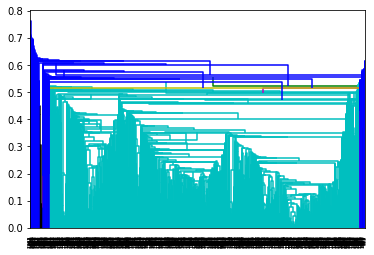

In [ ]:
den = dendrogram(hierarchy)

In [ ]:
clusters = defaultdict(list)
for i,val in enumerate(labels):
  clusters[val].append(cols[i])
for cluster in clusters:
  print("cluster:{} len:{}".format(cluster,len(clusters[cluster])))

cluster:1 len:1461
cluster:4 len:1
cluster:2 len:1
cluster:6 len:1
cluster:5 len:1
cluster:3 len:1


In [ ]:
hierarchy = linkage(squareform(dissimilarity), method='average')
labels = fcluster(hierarchy, 0.7, criterion='distance')
labels.max()

30

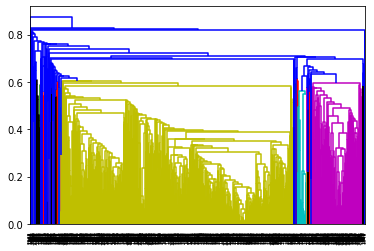

In [ ]:
den = dendrogram(hierarchy)

In [ ]:
clusters = defaultdict(list)
for i,val in enumerate(labels):
  clusters[val].append(cols[i])
for cluster in clusters:
  print("cluster:{} len:{}".format(cluster,len(clusters[cluster])))

cluster:17 len:1068
cluster:21 len:291
cluster:14 len:1
cluster:19 len:9
cluster:6 len:28
cluster:4 len:3
cluster:20 len:8
cluster:8 len:14
cluster:7 len:6
cluster:10 len:1
cluster:15 len:2
cluster:16 len:5
cluster:2 len:1
cluster:1 len:2
cluster:24 len:1
cluster:5 len:4
cluster:12 len:5
cluster:18 len:1
cluster:26 len:1
cluster:11 len:1
cluster:13 len:5
cluster:3 len:1
cluster:9 len:1
cluster:30 len:1
cluster:29 len:1
cluster:27 len:1
cluster:25 len:1
cluster:28 len:1
cluster:22 len:1
cluster:23 len:1


In [ ]:
path = 'drive/MyDrive/Metadata/Coordinates_2017.csv'
df = pd.read_csv(path)
df["cluster"] = -1
for i in range(len(df)):
  file_name =  'drive/MyDrive/2017_v1/{}_{}_2017.csv'.format(int(df.loc[i]["vSegID"]),int(df.loc[i]["vSegDir"]))
  for cluster in clusters:
    if file_name in clusters[cluster]:
      df.iloc[i] = [int(df.loc[i]["vSegID"]), int(df.loc[i]["vSegDir"]),
                   df.loc[i]["longitude"], df.loc[i]["latitude"],
                   cluster]
      break

df.to_csv("drive/MyDrive/SimilarityScores/Coordinates/2017/NonRushHourAverageClusterCoord_2017.csv")

In [ ]:
path = "drive/MyDrive/SimilarityScores/Coordinates/2017/NonRushHourAverageClusterCoord_2017.csv"
df = pd.read_csv(path)
df = df.drop("Unnamed: 0",axis=1)
df["cluster"] = df["cluster"].astype(str)
fig = px.scatter_mapbox(df, lon='latitude', lat='longitude', hover_name='vSegID', hover_data=['vSegDir',"cluster"],
                        color="cluster", zoom=4, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()